# XGBoost Model with Refined Feautures

## Based on the table and plot of the XGBoost with all Features, an F score threshold of 30 is appropriate 
### We will exclude features that scored less than 30 in the refined features XGBoost training to retain only the most significant features and reduce overall complexity
## Features to Keep:
### 4   Ecliptic Latitude deg	271.0
### 2	Galactic Latitude deg	250.0
### 3	Galactic Longitude deg	223.0
### 5	Ecliptic Longitude deg	201.0
### 11	Discovery Year	132.0
### 1	Number of Planets	78.0
### 6	Number of Photometry Time Series	32.0

## Features to Exclude:
### 0	Number of Stars	20.0
### 7	Number of Radial Velocity Time Series	17.0
### 8	Number of Stellar Spectra Measurements	14.0
### 10	Controversial Flag	7.0
### 9	Circumbinary Flag	5.0

### As well as every other feature that didn't make it on the graph

#### After training and testing without number of stars, the test accuracy went down approximately 0.3%, (96.42% to 96.11%) 
#### Readding 'Number of Stars' to the training data, accuracy went back up, so we will keep 'Number of Stars' as a feature

In [1]:
import pandas as pd
composite_preprocessed = pd.read_csv('Composite_preprocessed_NO_MV_BALANCED.csv')
composite_preprocessed.head()

,Number of Stars,Number of Planets,Number of Moons,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Radial Velocity Time Series,Number of Stellar Spectra Measurements,Number of Emission Spectroscopy Measurements,Number of Transmission Spectroscopy Measurements,Circumbinary Flag,Controversial Flag,Discovery Year,Detected by Transits
0,3.094076,-0.666894,0.0,2.424559,1.234306,-0.145901,-0.624689,0.613405,1.731519,-0.261600,-0.012466,-0.044364,0,0,2007,0
1,-0.256668,-0.666894,0.0,1.186720,-0.283545,1.148661,-0.992906,0.613405,0.729626,-0.261600,-0.012466,-0.044364,0,0,2009,0
2,-0.256668,-0.666894,0.0,-0.877523,-0.306068,0.308947,-2.327878,0.613405,0.729626,-0.261600,-0.012466,-0.044364,0,0,2008,0
3,-0.256668,0.216988,0.0,1.382856,-0.669803,0.872499,-0.152934,0.613405,3.735304,0.591749,-0.012466,-0.044364,0,0,2002,0
4,6.444820,-0.666894,0.0,0.261241,-0.531444,1.023143,0.855489,0.613405,3.735304,2.298449,-0.012466,-0.044364,0,0,1996,0


# Remove unimportant features

In [2]:
remove = ['Number of Radial Velocity Time Series',
          'Number of Stellar Spectra Measurements',
          'Controversial Flag',
          'Circumbinary Flag',
          'Number of Moons']

composite_unnecessary_removed = composite_preprocessed.drop(remove, axis=1)

# Train Test Split

In [3]:
# we are trying to predict whether an exoplanet has been detected by transits (0 or 1)
targets = composite_unnecessary_removed['Detected by Transits']
# training features are all variables except the targets
features = composite_unnecessary_removed.drop(['Detected by Transits'], axis=1)

## Observe Feature Correlations

In [4]:
features.corr()

,Number of Stars,Number of Planets,Galactic Latitude [deg],Galactic Longitude [deg],Ecliptic Latitude [deg],Ecliptic Longitude [deg],Number of Photometry Time Series,Number of Emission Spectroscopy Measurements,Number of Transmission Spectroscopy Measurements,Discovery Year
Number of Stars,1.000000,0.109074,-0.044988,0.104236,-0.087528,-0.069450,0.057734,-0.003200,-0.002096,-0.147575
Number of Planets,0.109074,1.000000,-0.055511,0.008589,0.026680,-0.023926,-0.002505,0.057797,0.076409,-0.072274
Galactic Latitude [deg],-0.044988,-0.055511,1.000000,-0.019213,0.463063,0.174632,-0.090369,-0.025691,-0.008918,0.031820
Galactic Longitude [deg],0.104236,0.008589,-0.019213,1.000000,-0.657044,-0.408779,0.131333,-0.008283,-0.026088,-0.106558
Ecliptic Latitude [deg],-0.087528,0.026680,0.463063,-0.657044,1.000000,0.498442,-0.222283,-0.006864,0.025212,0.081113
Ecliptic Longitude [deg],-0.069450,-0.023926,0.174632,-0.408779,0.498442,1.000000,-0.119612,0.013811,0.031078,0.058041
Number of Photometry Time Series,0.057734,-0.002505,-0.090369,0.131333,-0.222283,-0.119612,1.000000,-0.004172,-0.014848,-0.252983
Number of Emission Spectroscopy Measurements,-0.003200,0.057797,-0.025691,-0.008283,-0.006864,0.013811,-0.004172,1.000000,-0.000553,0.000791
Number of Transmission Spectroscopy Measurements,-0.002096,0.076409,-0.008918,-0.026088,0.025212,0.031078,-0.014848,-0.000553,1.000000,-0.015425
Discovery Year,-0.147575,-0.072274,0.031820,-0.106558,0.081113,0.058041,-0.252983,0.000791,-0.015425,1.000000


## Weak correlation between these pairs of features:
### Ecliptic Latitude and Number of Photometry Time Series; -0.222
### Number of Photometry Time Series and Discovery Year; -0.253


## Moderate correlation between these pairs of feaures:
### Galactic Latitude and Ecliptic Latitude; .463
### Galactic Longitude and Ecliptic Latitude; -.657
### Galactic Longitude and Ecliptic Longitude; -.408
### Ecliptic Latitude and Ecliptic Longitude; .498


## The rest of the feature pairs can be characterized as having very weak correlations

# Random seed for reproducability

### Every time we use random_state=42 it will shuffle the same random way

In [5]:
import random
import numpy as np
import xgboost as xgb

def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    xgb.set_config(verbosity=0) # silent verbosity to reduce output clutter

set_random_seed(42)

## Split data

In [6]:
# Splitting dataset into training, testing and validation addresses overfitting
# shuffling is necessary to remove dependencies that come from order of data


# 80:10:10 split ; Training ; Validation ; Testing
# so we split twice; once into 80:20, then 50:50 (so 50% of the designated testing portion is for validation)

# first split
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(features, targets, test_size = 0.2, random_state = 42, shuffle=True)

# second split
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42, shuffle=True)

# Fitting the XGBoost Model

In [7]:
# we use logloss (cross-entropy loss) since it measures performance of a classification model where output is probability btwn 0-1
# very suitable for binary classification problems

# logloss penalizes incorrect predictions more strongly than correct ones (penalty increases as predicted probability diverges from actual class label 0 or 1)
# robust metric for binary classification as it considers correctness of predictions and CONFIDENCE of those predictions

# logloss works with probability scores (outputs of models like logistic regression and XGBoost)
# this is useful bc XGBoost outputs probability scores for the positive class, and logloss is a natural way to evaluate these probabilities

# logloss is also continuous and differentiable (Great for optimizing)
# XGBoost uses gradient boosting, logloss provides smooth gradient for updates 

xgb_model_refined = xgb.XGBClassifier(eval_metric = 'logloss')


# XGBoost models can't have [, ] or < characters in feature names
# One or more of these characters are present in our features (ex: Ecliptic Latitude [deg])
# Use lambda to rename features and run the model

x_train_clean = x_train.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace('>', ''))
x_test_clean = x_test.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace('>', ''))
x_val_clean = x_val.rename(columns=lambda x: x.replace('[', '').replace(']', '').replace('<', '').replace('>', ''))

# incorporate early_stopping_rounds to save time and computational resources if model performance is unlikely to improve further
# model stops training if no improvement in the validation set for 10 rounds in a row 
# prevents ovefitting and makes training more efficient
xgb_model_refined.fit(x_train_clean, y_train, eval_set=[(x_val_clean, y_val)], early_stopping_rounds=10)

[0]	validation_0-logloss:0.49318
[1]	validation_0-logloss:0.38140
[2]	validation_0-logloss:0.30947
[3]	validation_0-logloss:0.26389


/Users/kevin/anaconda3/envs/py310_ds/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-logloss:0.23389
[5]	validation_0-logloss:0.20932
[6]	validation_0-logloss:0.19057
[7]	validation_0-logloss:0.17770
[8]	validation_0-logloss:0.16818
[9]	validation_0-logloss:0.16087
[10]	validation_0-logloss:0.15677
[11]	validation_0-logloss:0.15298
[12]	validation_0-logloss:0.15256
[13]	validation_0-logloss:0.14697
[14]	validation_0-logloss:0.14433
[15]	validation_0-logloss:0.14339
[16]	validation_0-logloss:0.14221
[17]	validation_0-logloss:0.13984
[18]	validation_0-logloss:0.13972
[19]	validation_0-logloss:0.13962
[20]	validation_0-logloss:0.13902
[21]	validation_0-logloss:0.13676
[22]	validation_0-logloss:0.13578
[23]	validation_0-logloss:0.13483
[24]	validation_0-logloss:0.13437
[25]	validation_0-logloss:0.13225
[26]	validation_0-logloss:0.13229
[27]	validation_0-logloss:0.13308
[28]	validation_0-logloss:0.13370
[29]	validation_0-logloss:0.13282
[30]	validation_0-logloss:0.13360
[31]	validation_0-logloss:0.13344
[32]	validation_0-logloss:0.13241
[33]	validation_0-lo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

## Predict on the test set

### See the actual predictions of the model on the test set

In [8]:
y_pred_xgb_refined = xgb_model_refined.predict(x_test_clean)
y_pred_xgb_refined

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

# Performance metrics

In [9]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb_refined)
xgb_refined_accuracy = accuracy_score(y_test, y_pred_xgb_refined)
classif_report = classification_report(y_test, y_pred_xgb_refined)
roc_score = roc_auc_score(y_test, y_pred_xgb_refined)

print(
    cm,
    '\nDNN Accuracy on Test Set:', xgb_refined_accuracy,
    '\nDNN Classification Report on Test Set:\n', classif_report,
    '\nDNN ROC AUC Score on Test Set:\n', roc_score) 

[[319  15]
 [  8 302]] 
DNN Accuracy on Test Set: 0.9642857142857143 
DNN Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       334
           1       0.95      0.97      0.96       310

    accuracy                           0.96       644
   macro avg       0.96      0.96      0.96       644
weighted avg       0.96      0.96      0.96       644
 
DNN ROC AUC Score on Test Set:
 0.9646416843731891


## Test set ROC AUC score 

In [10]:
y_prob_xgb_refined = xgb_model_refined.predict_proba(x_test_clean)[:,1]
roc_auc_xgb_refined = roc_auc_score(y_test, y_prob_xgb_refined)

('ROC AUC Score Refined Features:', roc_auc_xgb_refined)

('ROC AUC Score Refined Features:', 0.985734981649604)

## K-Fold Cross validation score

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_refined = cross_val_score(xgb_model_refined, x_train_clean, y_train, cv=kf, scoring = 'accuracy')
roc_auc_scores_refined = cross_val_score(xgb_model_refined, x_train_clean, y_train, cv=kf, scoring=make_scorer(roc_auc_score, needs_proba=True))

(f"Cross-Validation Accuracy Scores: {cv_scores_refined}"),(f"Mean CV Accuracy: {cv_scores_refined.mean()}"),(f"Cross-Validation ROC-AUC Scores: {roc_auc_scores_refined}"),(f"Mean CV ROC-AUC: {roc_auc_scores_refined.mean()}")

('Cross-Validation Accuracy Scores: [0.96504854 0.97475728 0.96601942 0.96015549 0.96793003]',
 'Mean CV Accuracy: 0.9667821525281403',
 'Cross-Validation ROC-AUC Scores: [0.99144301 0.99462806 0.99250025 0.9900436  0.99413281]',
 'Mean CV ROC-AUC: 0.9925495474674891')

## Feature Importance Table
### (Importance type = weight)

In [12]:
importance_type = 'weight'

# extract importance of type weight from the xgb model 
feature_importances = xgb_model_refined.get_booster().get_score(importance_type = importance_type) 

# extract feature names
feature_names = x_train.columns


# create pd df with the extracted information and sort features by importance (type =  weight)
feature_importance_df = pd.DataFrame(list(feature_importances.items()), columns = ['Features', 'Importance']).sort_values(by='Importance', ascending=False)

feature_importance_df

,Features,Importance
4,Ecliptic Latitude deg,196.0
3,Galactic Longitude deg,195.0
2,Galactic Latitude deg,193.0
5,Ecliptic Longitude deg,167.0
7,Discovery Year,133.0
1,Number of Planets,64.0
6,Number of Photometry Time Series,34.0
0,Number of Stars,28.0


## Plot Feature Importance

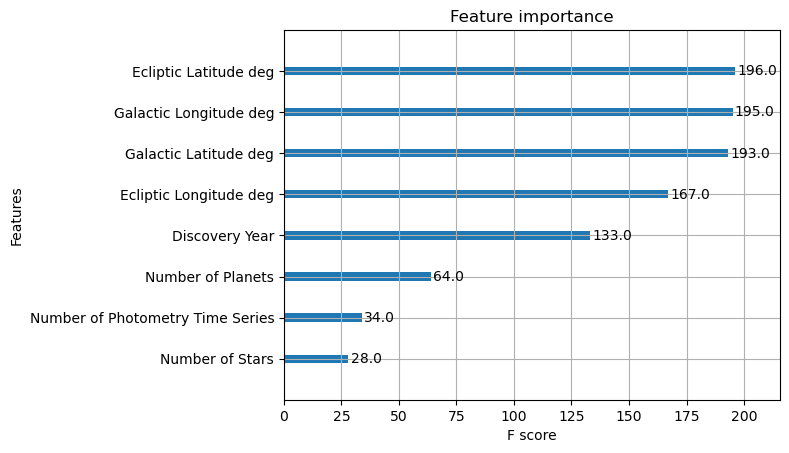

In [13]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model_refined)
plt.show()

## F Score (weight) in this context represents the frequency in which a feature is used in the splits of the trees across the entire ensemble
### Frequency refers to the number of times a feature is used to split the data across all trees in the model
### Higher F score means a feature is used more frequently to create decision points (splits) in the trees, indicating the feature is considered important by the model

## Accuracy Comparison:

### Refined model shows the same test accuracy compared to the model with all features. Yet, removing the less important features helps simplify the binary classification task. 

## ROC-AUC Score Comparison:

### The ROC-AUC score is slightly lower for the refined model (-0.02%). This can be considered negligible. We traded off complexity (a high number of features in the XGB model with all input variables) for a simpler, faster, and potentially more interpretable model. This is a significant advantage in many scenarios.

## Precision, Recall, and F1-Score Comparison:

### Classification report reveals that the refined model has the same precision, recall, and F1-scores for one or both classes. This implies that the model's predictions are the same in balance and accuracy after feature refinement.

## Cross-validation Results:

### The CV results indicate that the refined XGBoost model has strong and consistent performance across different subsets of the data. The mean accuracy and ROC-AUC scores suggest that the model is robust and generalizes well to unseen data. Mean cross-validation accuracy of 96.67% and the mean cross-validation ROC-AUC score of 99.25% highlights the model's high predictive power and discriminative ability.